In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('/content/sample_data/DDI_data.csv')
df.head()



,drug1_id,drug2_id,drug1_name,drug2_name,interaction_type
0,DB00006,DB00346,Bivalirudin,Alfuzosin,serum concentration
1,DB00006,DB13783,Bivalirudin,Acemetacin,risk or severity of bleeding
2,DB00006,DB06605,Bivalirudin,Apixaban,anticoagulant activities
3,DB00006,DB06695,Bivalirudin,Dabigatran etexilate,anticoagulant activities
4,DB00006,DB09075,Bivalirudin,Edoxaban,anticoagulant activities


In [ ]:
df.isnull().sum()

,0
drug1_id,0
drug2_id,0
drug1_name,0
drug2_name,0
interaction_type,0


In [ ]:
# Forward fill method to fill null values
df_filled = df.fillna(method='ffill')

# Verify that null values have been filled
print(df_filled.isnull().sum())

# You can now use df_filled for further processing


<ipython-input-5-812892290e0a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


drug1_id            0
drug2_id            0
drug1_name          0
drug2_name          0
interaction_type    0
dtype: int64


In [ ]:
pip install pandas matplotlib seaborn networkx wordcloud

# ** Bar Chart: Interaction Type Frequency**

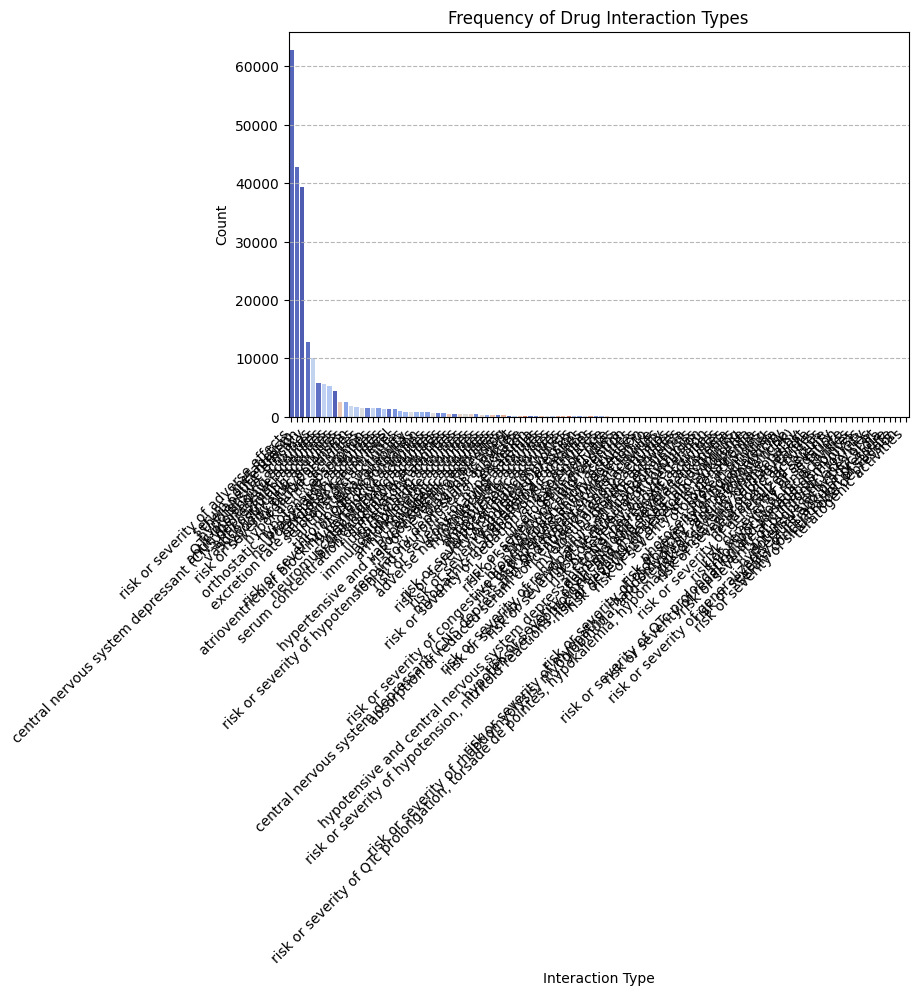

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="interaction_type", data=df, order=df["interaction_type"].value_counts().index, palette="coolwarm", hue="interaction_type", legend=False)
plt.title("Frequency of Drug Interaction Types")
plt.xlabel("Interaction Type") # Changed x and y labels
plt.ylabel("Count") # Changed x and y labels
plt.grid(axis='y', linestyle='--', alpha=0.9) # Changed axis for grid
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()


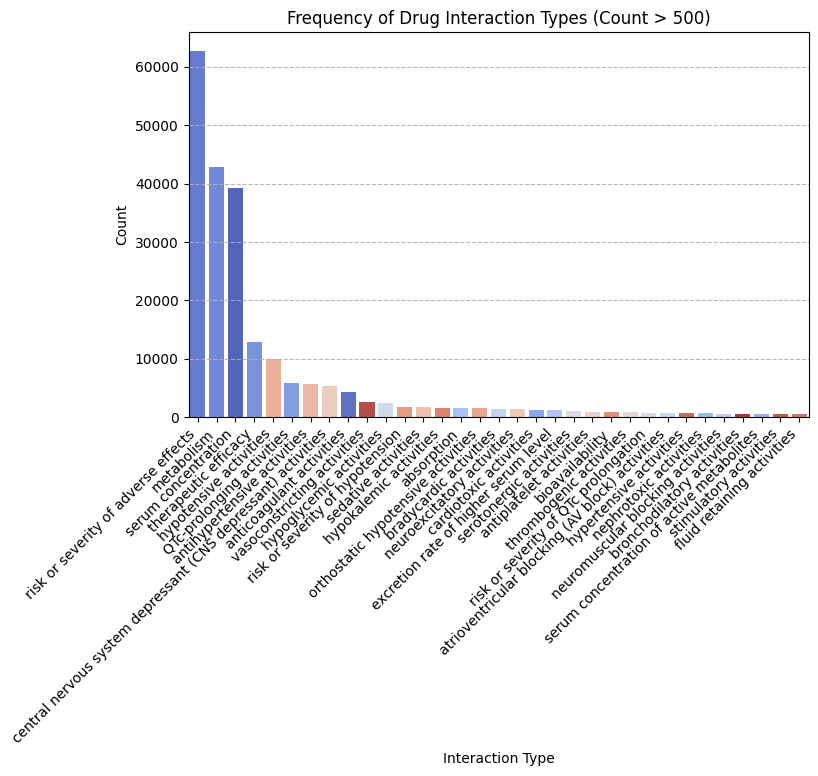

In [ ]:
interaction_counts = df["interaction_type"].value_counts()
filtered_interactions = interaction_counts[interaction_counts > 500].index

df_filtered = df[df["interaction_type"].isin(filtered_interactions)]

# Plot the filtered data
plt.figure(figsize=(8, 5))
sns.countplot(
    x="interaction_type",
    data=df_filtered,
    order=df_filtered["interaction_type"].value_counts().index,
    palette="coolwarm",
    hue="interaction_type",
    legend=False
)
plt.title("Frequency of Drug Interaction Types ( 500)")
plt.xlabel("Interaction Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xticks(rotation=45, ha='right')
plt.show()

# **Word Cloud: Common Interaction Types**

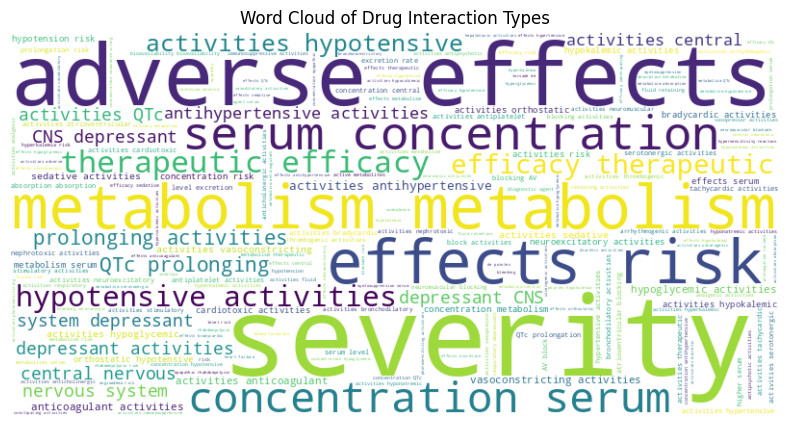

In [ ]:
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["interaction_type"].astype(str)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Drug Interaction Types")
plt.show()

# **Network Graph: Drug Interaction Relationship**

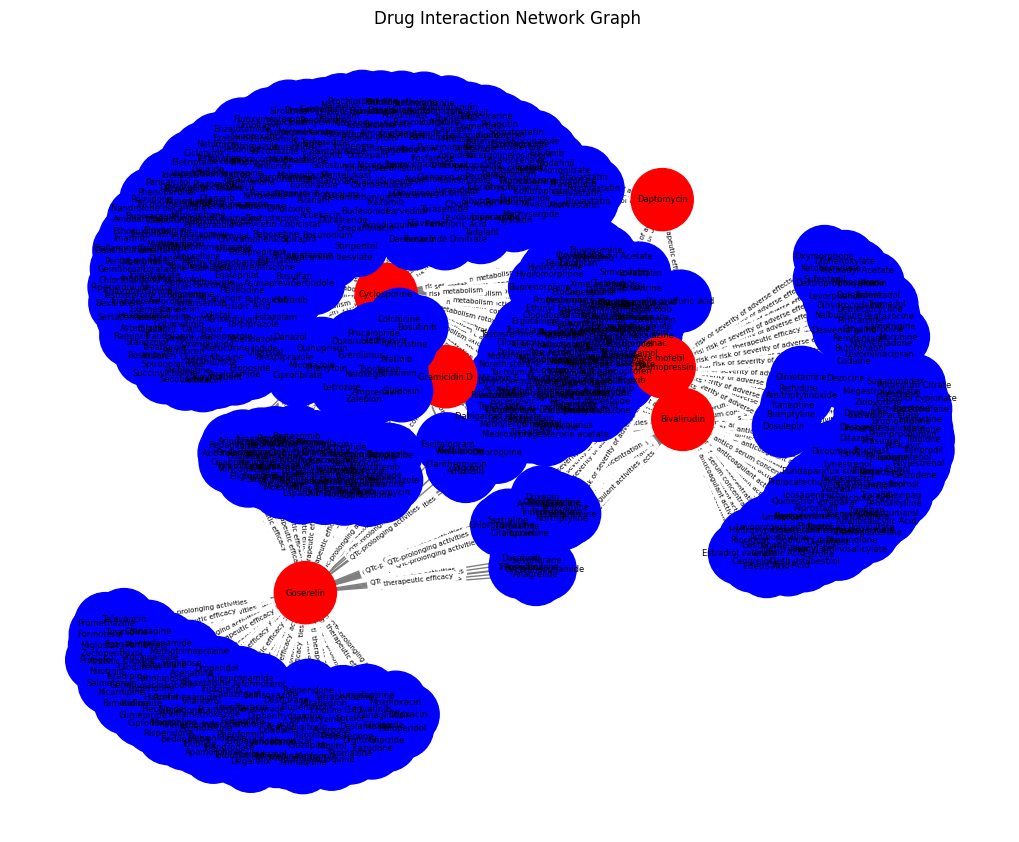

In [ ]:
df_sample = df.head(1100)

# Create a graph
G = nx.Graph()

# Add nodes and edges
for _, row in df_sample.iterrows():
    G.add_node(row["drug1_name"], color="red")
    G.add_node(row["drug2_name"], color="blue")
    G.add_edge(row["drug1_name"], row["drug2_name"], label=row["interaction_type"])

# Plot the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
colors = ["red" if G.nodes[n]["color"] == "red" else "blue" for n in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=colors, edge_color="gray", font_size=6, node_size=2000)
edge_labels = {(row["drug1_name"], row["drug2_name"]): row["interaction_type"] for _, row in df_sample.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

plt.title("Drug Interaction Network Graph ")
plt.show()

  Bar Chart – Top 10 Interaction Types

<ipython-input-20-52fcdacd276d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_interactions.values, y=top_interactions.index, palette="viridis")


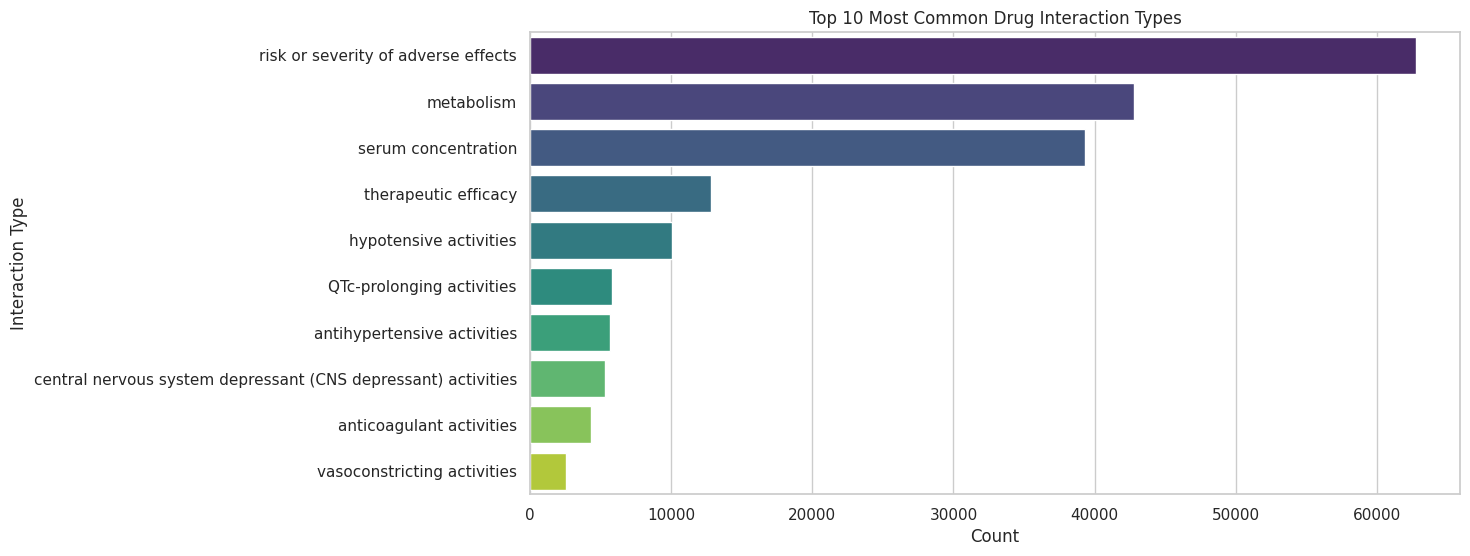

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set Seaborn style
sns.set_theme(style="whitegrid")

# Count the most common interaction types
top_interactions = df["interaction_type"].value_counts().nlargest(10)

# Plot the top interaction types
plt.figure(figsize=(12, 6))
sns.barplot(x=top_interactions.values, y=top_interactions.index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Interaction Type")
plt.title("Top 10 Most Common Drug Interaction Types")
plt.show()


**Bar Chart – Top 10 Drugs in Interactions**

<ipython-input-21-023d5bce13e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_counts.values, y=drug_counts.index, palette="magma")


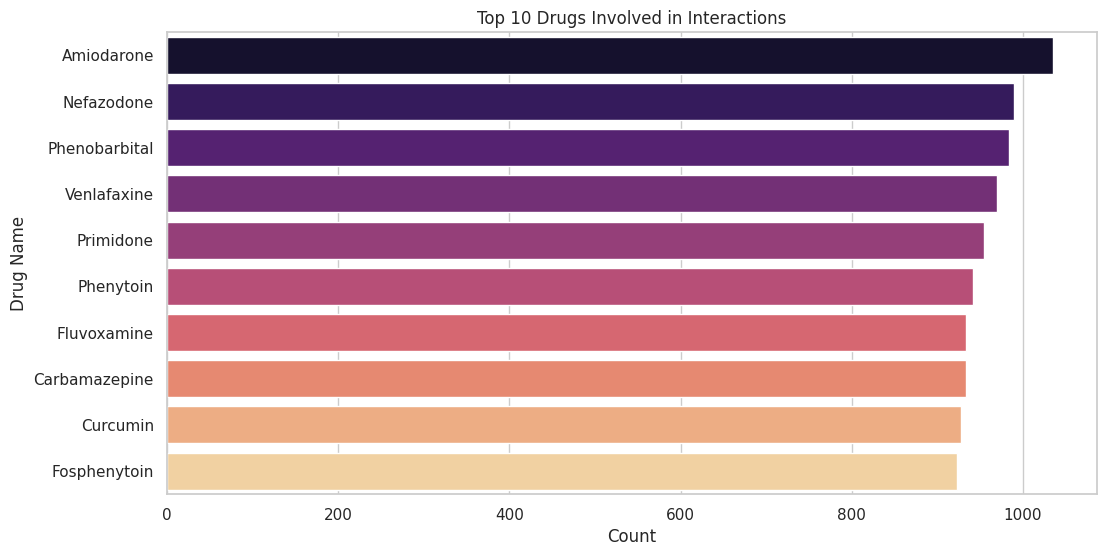

In [ ]:
# Count occurrences of each drug in both drug1 and drug2 columns
drug_counts = pd.concat([df["drug1_name"], df["drug2_name"]]).value_counts().nlargest(10)

# Plot the top drugs involved in interactions
plt.figure(figsize=(12, 6))
sns.barplot(x=drug_counts.values, y=drug_counts.index, palette="magma")
plt.xlabel("Count")
plt.ylabel("Drug Name")
plt.title("Top 10 Drugs Involved in Interactions")
plt.show()


**Network Graph – Drug Interactions**

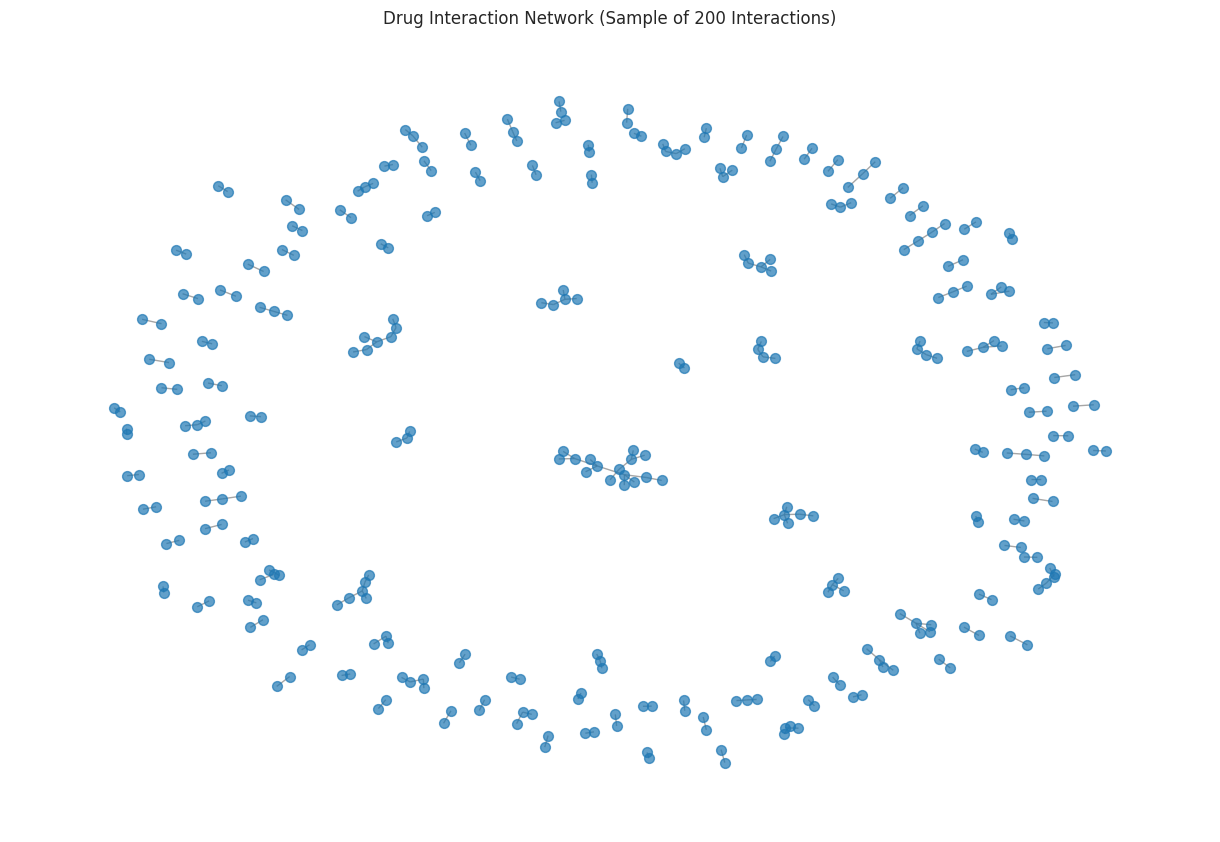

In [ ]:
import networkx as nx

# Sample a smaller subset of interactions for visualization
sample_size = 200
df_sample = df.sample(n=sample_size, random_state=42)

# Create a graph
G = nx.Graph()
for _, row in df_sample.iterrows():
    G.add_edge(row["drug1_name"], row["drug2_name"])

# Plot the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=50, edge_color="gray", alpha=0.7)
plt.title("Drug Interaction Network (Sample of 200 Interactions)")
plt.show()


**Word Cloud – Interaction Type Distribution**

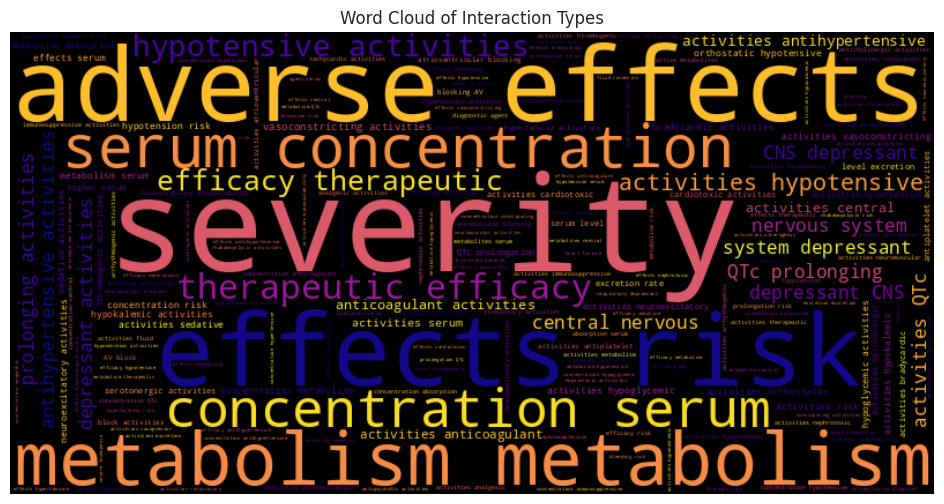

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for interaction types
interaction_text = " ".join(df["interaction_type"])

wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="plasma").generate(interaction_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Interaction Types")
plt.show()


**Heatmap – Top Drug Interactions**

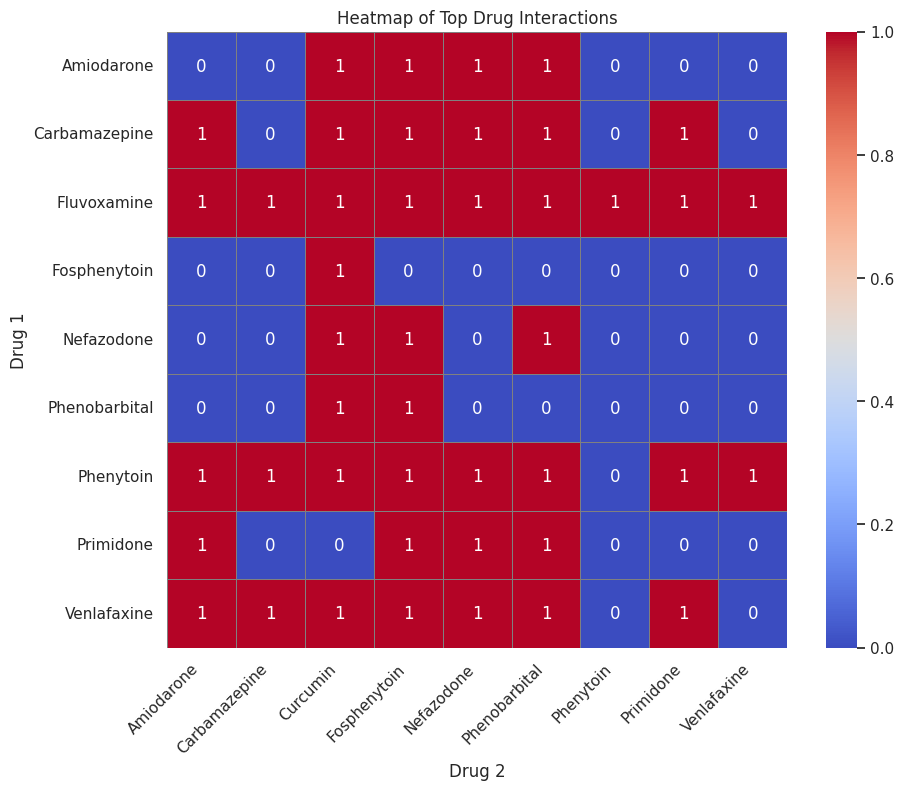

In [ ]:
# Get the top 10 most common interacting drugs
top_drugs = drug_counts.index.tolist()

# Filter dataset for interactions involving these top drugs
df_top = df[(df["drug1_name"].isin(top_drugs)) & (df["drug2_name"].isin(top_drugs))]

# Create a pivot table for the heatmap
heatmap_data = df_top.pivot_table(index="drug1_name", columns="drug2_name", aggfunc="size", fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, linecolor="gray")

plt.xlabel("Drug 2")
plt.ylabel("Drug 1")
plt.title("Heatmap of Top Drug Interactions")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


**Pie Chart – Distribution of Interaction Types**

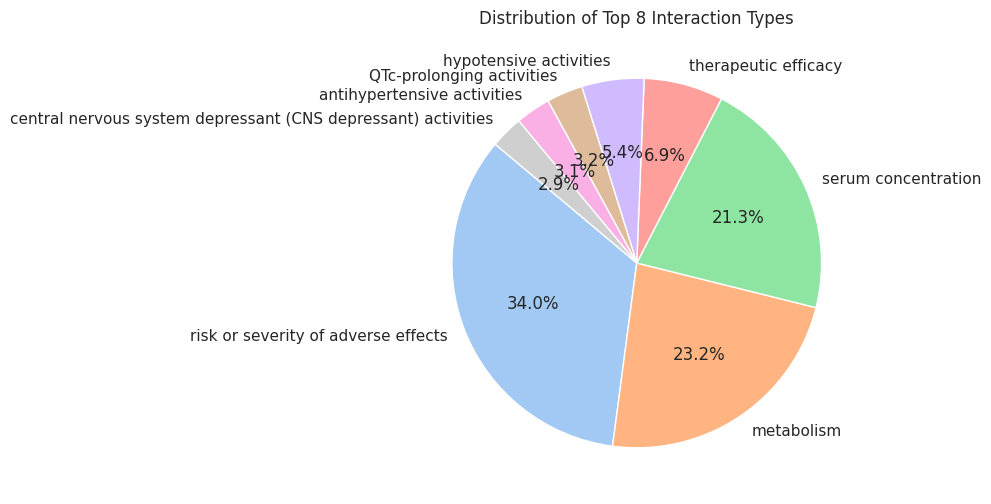

In [ ]:
interaction_counts = df["interaction_type"].value_counts().nlargest(8)

# Plot the pie chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(interaction_counts))
plt.pie(interaction_counts, labels=interaction_counts.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Distribution of Top 8 Interaction Types")
plt.show()

**Scatter Plot – Interaction Frequency of Drugs**

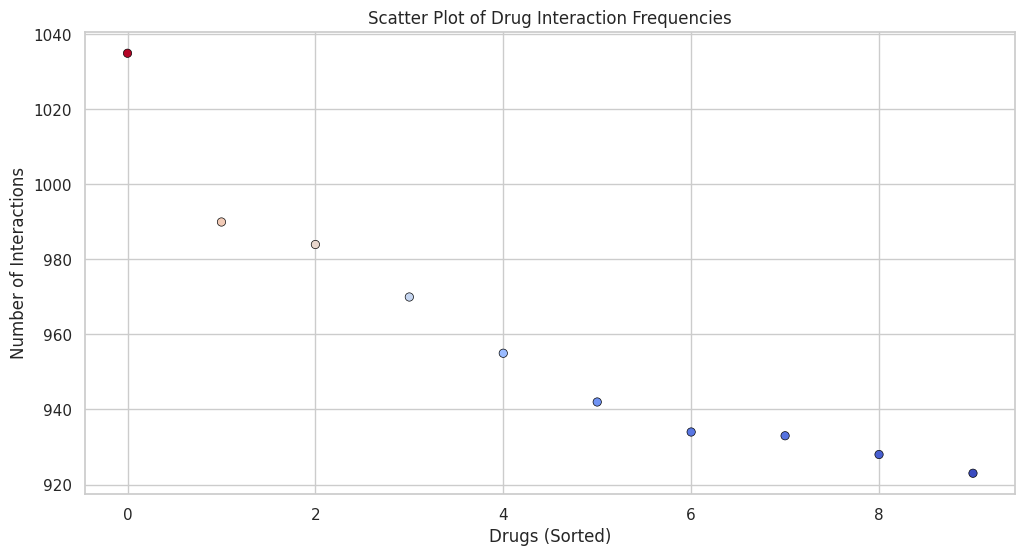

In [ ]:
# Scatter plot for drug interaction frequencies
plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(drug_counts)), y=drug_counts.values, hue=drug_counts.values, palette="coolwarm", edgecolor="black")

plt.xlabel("Drugs (Sorted)")
plt.ylabel("Number of Interactions")
plt.title("Scatter Plot of Drug Interaction Frequencies")
plt.legend([],[], frameon=False)
plt.show()


** Bubble Chart – Interaction Frequency vs. Unique Drugs**

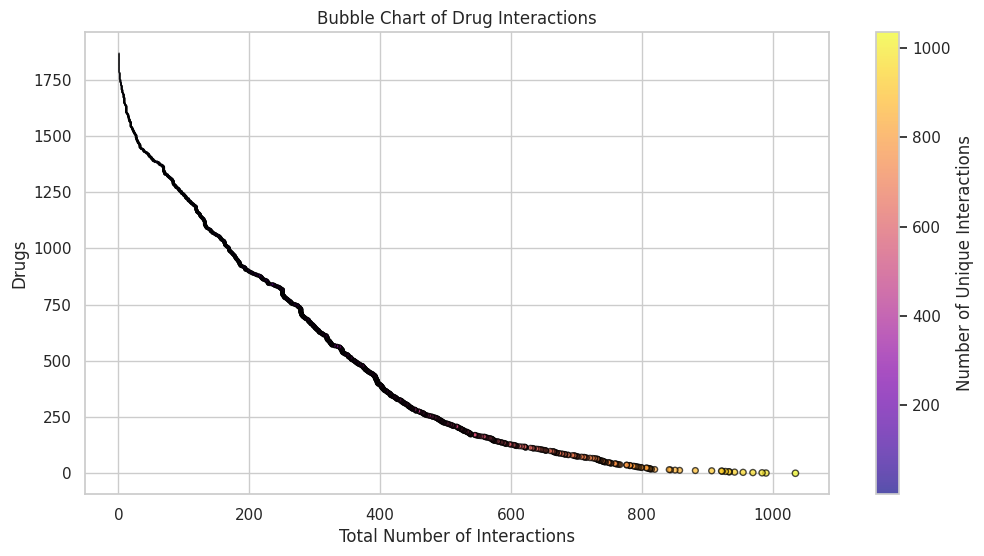

In [ ]:
# Count unique drugs each drug interacts with
unique_interactions = pd.concat([df["drug1_name"], df["drug2_name"]]).value_counts()

# Bubble chart
plt.figure(figsize=(12, 6))
bubble = plt.scatter(unique_interactions.values, range(len(unique_interactions)), s=unique_interactions.values/50, c=unique_interactions.values, cmap="plasma", alpha=0.7, edgecolors="black")

plt.colorbar(bubble, label="Number of Unique Interactions")
plt.xlabel("Total Number of Interactions")
plt.ylabel("Drugs")
plt.title("Bubble Chart of Drug Interactions")
plt.show()


**Circular Graph – Drug Interactions**

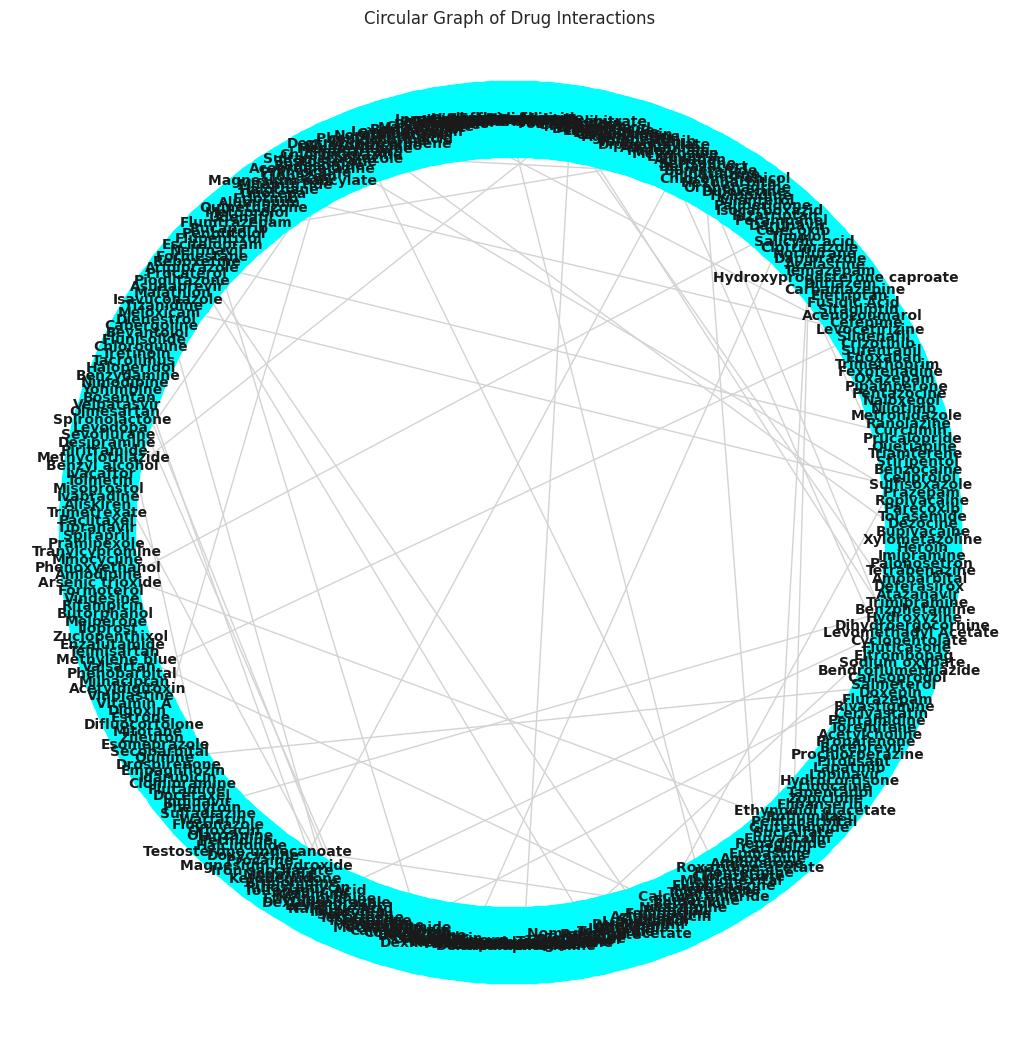

In [ ]:
# Circular network graph
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="cyan", edge_color="lightgray", font_size=10, font_weight="bold")

plt.title("Circular Graph of Drug Interactions")
plt.show()


**Histogram – Distribution of Interaction Frequencies**

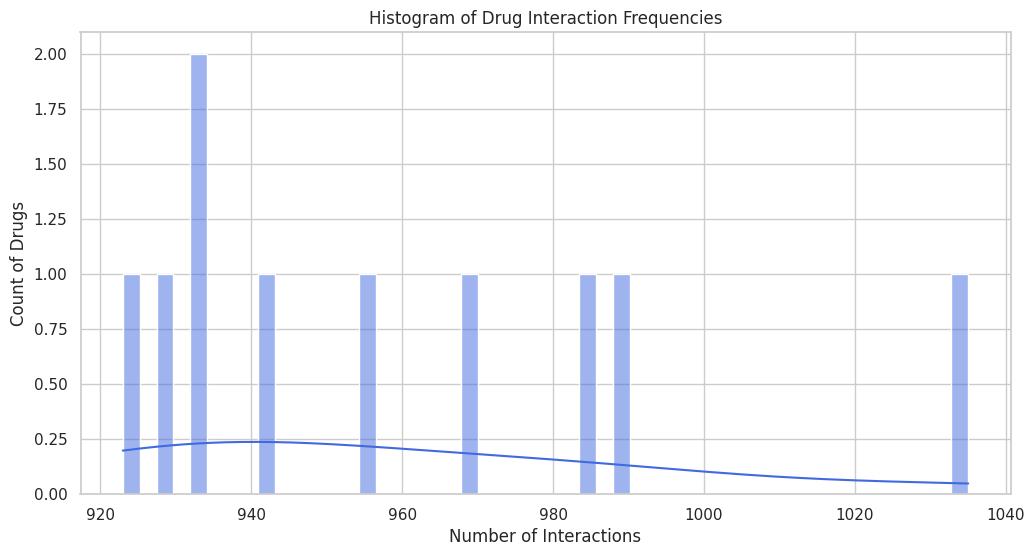

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(drug_counts, bins=50, kde=True, color="royalblue")

plt.xlabel("Number of Interactions")
plt.ylabel("Count of Drugs")
plt.title("Histogram of Drug Interaction Frequencies")
plt.show()


**Violin Plot – Spread of Interaction Frequencies**

<ipython-input-30-1d317654df8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=drug_counts, inner="quartile", palette="coolwarm")


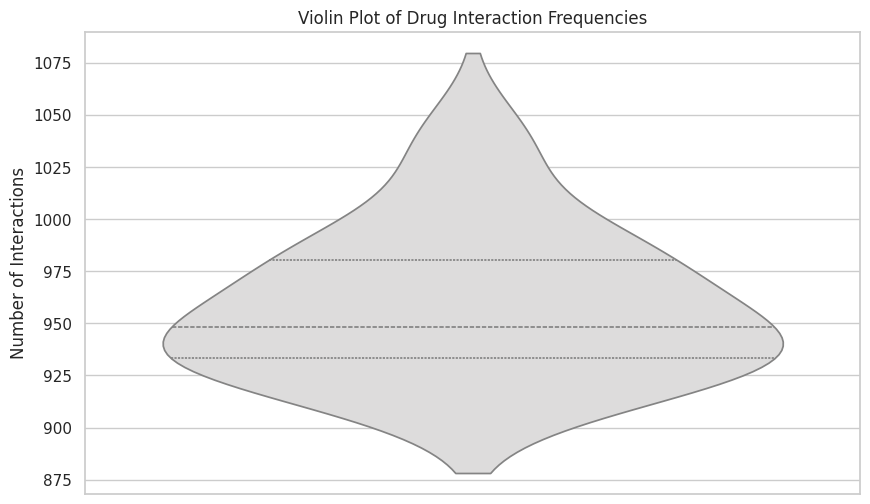

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=drug_counts, inner="quartile", palette="coolwarm")

plt.ylabel("Number of Interactions")
plt.title("Violin Plot of Drug Interaction Frequencies")
plt.show()


**Box Plot – Distribution of Drug Interactions**

<ipython-input-33-72025e4d03cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=drug_counts, palette="coolwarm")


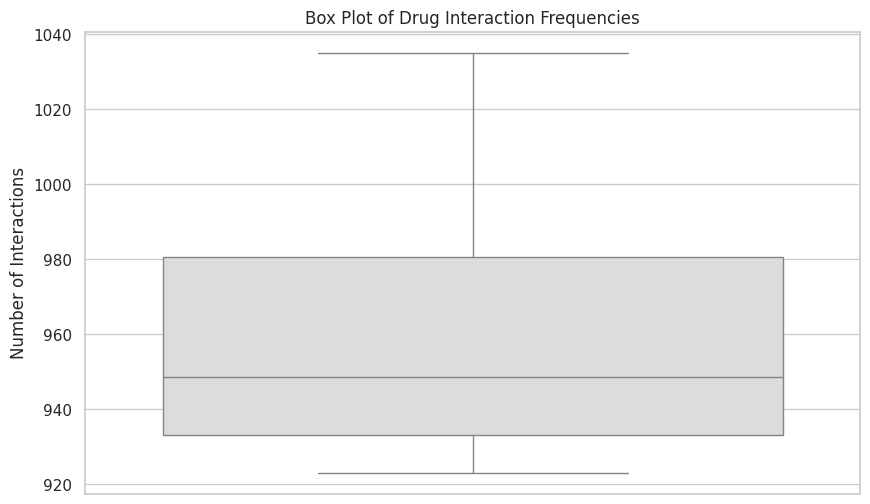

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=drug_counts, palette="coolwarm")

plt.ylabel("Number of Interactions")
plt.title("Box Plot of Drug Interaction Frequencies")
plt.show()